In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.__version__

'2.8.0'

In [4]:
data = pd.read_csv('kddcup.data.gz')
data.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
data.shape

(4898430, 42)

In [6]:
d = data.describe()
pd.set_option('display.max_columns', d.shape[1]+1)
print(d)

                  0           215         45076           0.1           0.2  \
count  4.898430e+06  4.898430e+06  4.898430e+06  4.898430e+06  4.898430e+06   
mean   4.834244e+01  1.834622e+03  1.093614e+03  5.716117e-06  6.487793e-04   
std    7.233299e+02  9.414312e+05  6.450124e+05  2.390834e-03  4.285434e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  4.500000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  5.200000e+02  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.032000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
max    5.832900e+04  1.379964e+09  1.309937e+09  1.000000e+00  3.000000e+00   

                0.3           0.4           0.5             1           0.6  \
count  4.898430e+06  4.898430e+06  4.898430e+06  4.898430e+06  4.898430e+06   
mean   7.961735e-06  1.243766e-02  3.205109e-05  1.435288e-01  8.088306e-03   
std    7.215084e-03  4.689782e-01  7.299408e-03  3.

In [7]:
# we can drop column 0.13

In [8]:
data = data.drop('0.13', axis= 1)
data.shape

(4898430, 41)

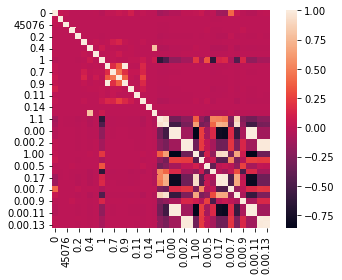

In [9]:
import seaborn as sns
# Calculate correlation between each pair of variable
corr_matrix=data.corr()

sns.heatmap(corr_matrix, square=True)

In [10]:
corr_matrix.head()

,0,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13
0,1.000000,0.041221,0.020392,-0.000160,-0.001012,3.765465e-03,0.004450,0.007412,-0.020624,0.027126,0.026378,0.052088,0.028718,0.095068,-0.000460,0.023524,-0.000021,0.002389,-0.105074,-0.079863,-0.031098,-0.031110,0.016549,0.016836,0.021719,0.050286,-0.012754,0.010914,-0.117309,-0.119105,0.409009,0.042774,-0.008582,-0.030546,-0.030570,0.010569,0.016034
215,0.041221,1.000000,0.000239,-0.000005,-0.000027,-8.677525e-08,0.000782,-0.000007,0.000200,0.000005,-0.000006,-0.000004,-0.000002,0.000037,0.000022,-0.000022,-0.000001,-0.000036,-0.001663,-0.001151,-0.000586,-0.000632,0.003210,0.003287,0.000670,0.000329,-0.000142,-0.002416,-0.001715,-0.001548,0.000719,-0.000793,0.000005,-0.000821,-0.000635,-0.000154,0.002927
45076,0.020392,0.000239,1.000000,-0.000004,-0.000026,1.645208e-04,0.000126,0.000632,0.002119,0.001307,0.000988,0.001204,0.001303,0.000256,-0.000011,0.000352,0.000004,0.000035,-0.002646,-0.001998,-0.000774,-0.000773,0.002463,0.002467,0.000910,-0.000393,0.000311,-0.001534,-0.001067,-0.000968,0.003307,-0.000558,0.000346,-0.000765,-0.000763,0.002502,0.002512
0.1,-0.000160,-0.000005,-0.000004,1.000000,-0.000036,-2.638263e-06,-0.000063,-0.000010,-0.000979,-0.000005,-0.000020,-0.000011,-0.000008,-0.000023,-0.000020,-0.000069,-0.000002,-0.000069,-0.003735,-0.002852,0.004997,0.005141,-0.000347,-0.000593,0.000926,0.000503,0.013491,-0.008610,-0.004174,0.000865,-0.000236,0.001479,0.033193,0.004648,0.003096,-0.000552,-0.000597
0.2,-0.001012,-0.000027,-0.000026,-0.000036,1.000000,-1.670585e-05,-0.000402,-0.000066,-0.006197,-0.000032,-0.000125,-0.000069,-0.000050,-0.000145,-0.000129,-0.000435,-0.000010,-0.000438,-0.019948,-0.015327,-0.004469,-0.007051,-0.003663,-0.003756,0.005574,-0.002267,0.000128,-0.001786,-0.018699,-0.017398,0.022974,-0.010194,0.003998,-0.006090,-0.007047,0.009444,-0.003779


In [11]:
# features with high corr
l = []
for a in list(corr_matrix.columns):
  for b in list(corr_matrix.columns):
    if a != b and corr_matrix[a][b] > 0.8:
      l.append((min(a,b), max(a,b)))
l = list(set(l))
l = sorted(l)
l

[('0.00', '0.00.1'),
 ('0.00', '0.00.10'),
 ('0.00', '0.00.11'),
 ('0.00.1', '0.00.10'),
 ('0.00.1', '0.00.11'),
 ('0.00.10', '0.00.11'),
 ('0.00.12', '0.00.13'),
 ('0.00.12', '0.00.2'),
 ('0.00.12', '0.00.3'),
 ('0.00.13', '0.00.2'),
 ('0.00.13', '0.00.3'),
 ('0.00.2', '0.00.3'),
 ('0.00.6', '0.17'),
 ('0.00.6', '1.00'),
 ('0.00.8', '1.1'),
 ('0.00.8', '1.2'),
 ('0.15', '0.4'),
 ('0.17', '1.00'),
 ('0.6', '0.9'),
 ('1.1', '1.2')]

In [12]:
ds = []
ds1 = []
for i in l:
  ds.append(i[0])
  ds.append(i[1])
  ds1.append(i[0])
ds = [ (i,ds.count(i)) for i in set(ds) ]
ds = sorted(ds)
ds

[('0.00', 3),
 ('0.00.1', 3),
 ('0.00.10', 3),
 ('0.00.11', 3),
 ('0.00.12', 3),
 ('0.00.13', 3),
 ('0.00.2', 3),
 ('0.00.3', 3),
 ('0.00.6', 2),
 ('0.00.8', 2),
 ('0.15', 1),
 ('0.17', 2),
 ('0.4', 1),
 ('0.6', 1),
 ('0.9', 1),
 ('1.00', 2),
 ('1.1', 2),
 ('1.2', 2)]

In [13]:
# it seems justified to delete columns in ds1 via the greedy algorithm above

In [14]:
data = data.drop(ds1, axis= 1)
data.shape

(4898430, 29)

In [15]:
data.isnull().sum()

0          0
tcp        0
http       0
SF         0
215        0
45076      0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.14       0
1.2        0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
0.16       0
0.00.7     0
0.00.9     0
0.00.11    0
normal.    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   0        int64  
 1   tcp      object 
 2   http     object 
 3   SF       object 
 4   215      int64  
 5   45076    int64  
 6   0.1      int64  
 7   0.2      int64  
 8   0.3      int64  
 9   0.4      int64  
 10  0.5      int64  
 11  1        int64  
 12  0.7      int64  
 13  0.8      int64  
 14  0.9      int64  
 15  0.10     int64  
 16  0.11     int64  
 17  0.12     int64  
 18  0.14     int64  
 19  1.2      int64  
 20  0.00.3   float64
 21  1.00     float64
 22  0.00.4   float64
 23  0.00.5   float64
 24  0.16     int64  
 25  0.00.7   float64
 26  0.00.9   float64
 27  0.00.11  float64
 28  normal.  object 
dtypes: float64(7), int64(18), object(4)
memory usage: 1.1+ GB


In [17]:
data.groupby(by='tcp').count()

,0,http,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.7,0.8,0.9,0.10,0.11,0.12,0.14,1.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.00.7,0.00.9,0.00.11,normal.
tcp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545,2833545
tcp,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597,1870597
udp,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288,194288


In [18]:
data.groupby(by='http').count()

,0,tcp,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.7,0.8,0.9,0.10,0.11,0.12,0.14,1.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.00.7,0.00.9,0.00.11,normal.
http,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRC,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521
X11,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Z39_50,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078
aol,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
auth,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382,3382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
urp_i,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378
uucp,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
uucp_path,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057


In [19]:
data.groupby(by='SF').count()

,0,tcp,http,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.7,0.8,0.9,0.10,0.11,0.12,0.14,1.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.00.7,0.00.9,0.00.11,normal.
SF,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OTH,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
REJ,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874,268874
RSTO,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344,5344
RSTOS0,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
RSTR,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094
S0,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829,869829
S1,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532
S2,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
S3,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


In [20]:
# We can drop http and SF column as they have have a large number of distinct values

In [21]:
data = data.drop(['http', 'SF'], axis = 1)
data.shape

(4898430, 27)

In [22]:
# use LabelEncoder to encode tcp

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
data.tcp = labelencoder.fit_transform(data.tcp)
data.head()

,0,tcp,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.7,0.8,0.9,0.10,0.11,0.12,0.14,1.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.00.7,0.00.9,0.00.11,normal.
0,0,1,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,normal.
1,0,1,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,2,0.0,0.0,0.0,normal.
2,0,1,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,normal.
3,0,1,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0.0,1.0,0.0,0.0,4,0.0,0.0,0.0,normal.
4,0,1,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0.0,1.0,0.0,0.0,5,0.0,0.0,0.0,normal.


In [24]:
data['normal.'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972780
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: normal., dtype: int64

In [25]:
# create a new column classes, with smurf = 0, neptune = 1, normal = 2, others = 3

In [26]:
def label(row):
  if row['normal.'] == 'smurf.':
    return 0
  elif row['normal.'] == 'neptune.':
    return 1
  elif row['normal.'] == 'normal.':
    return 2
  else:
    return 3

In [27]:
data['class'] = data.apply (lambda row: label(row), axis=1)
data.head()

,0,tcp,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.7,0.8,0.9,0.10,0.11,0.12,0.14,1.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.00.7,0.00.9,0.00.11,normal.,class
0,0,1,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,normal.,2
1,0,1,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,2,0.0,0.0,0.0,normal.,2
2,0,1,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,normal.,2
3,0,1,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0.0,1.0,0.0,0.0,4,0.0,0.0,0.0,normal.,2
4,0,1,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0.0,1.0,0.0,0.0,5,0.0,0.0,0.0,normal.,2


In [28]:
data = data.drop('normal.', axis = 1)
data.shape

(4898430, 27)

In [29]:
df_train = data.sample(frac=0.7, random_state = 0)
df_valid = data.drop(df_train.index)
X_train = df_train.drop('class', axis = 1)
X_valid = df_valid.drop('class', axis = 1)
y_train = df_train['class']
y_valid = df_valid['class']
print(X_train.shape)
print(X_valid.shape)

(3428901, 26)
(1469529, 26)


In [30]:
col = X_train.columns

In [31]:
col = list(col)
col

['0',
 'tcp',
 '215',
 '45076',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '1',
 '0.7',
 '0.8',
 '0.9',
 '0.10',
 '0.11',
 '0.12',
 '0.14',
 '1.2',
 '0.00.3',
 '1.00',
 '0.00.4',
 '0.00.5',
 '0.16',
 '0.00.7',
 '0.00.9',
 '0.00.11']

In [32]:
# big data with uneven range => use Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_train

array([[-6.71038636e-02, -8.05249206e-01, -6.74816668e-04, ...,
        -2.82837099e-01, -1.56300157e-01, -4.65380213e-01],
       [-6.71038636e-02,  9.41441530e-01, -2.09543727e-03, ...,
         4.54423281e-01, -1.56300157e-01,  2.15148572e+00],
       [-6.71038636e-02, -8.05249206e-01, -6.74816668e-04, ...,
        -2.82837099e-01, -1.56300157e-01, -4.65380213e-01],
       ...,
       [-6.71038636e-02, -8.05249206e-01, -6.74816668e-04, ...,
        -2.82837099e-01, -1.56300157e-01, -4.65380213e-01],
       [-6.71038636e-02, -8.05249206e-01, -6.74816668e-04, ...,
        -2.82837099e-01, -1.56300157e-01, -4.65380213e-01],
       [-6.71038636e-02, -8.05249206e-01, -1.37962069e-03, ...,
        -2.82837099e-01, -1.56300157e-01, -4.65380213e-01]])

In [34]:
X_valid = sc.transform(X_valid)

In [35]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
min_delta=0.001, # minimium amount of change to count as an improvement
patience=5, # how many epochs to wait before stopping
restore_best_weights=True,
)

In [37]:
def build_ANN():
  model = Sequential()
  # Adding the input layer and the first hidden layer
  model.add(Dense(units = 64, activation='relu', input_shape=(26,)))
  # model.add(Dropout(rate=0.2))
  # Addding the second hidden layer
  model.add(Dense(units = 128,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the third hidden layer
  model.add(Dense(units = 128,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the fourth hidden layer
  model.add(Dense(units = 128,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the fifth hidden layer
  model.add(Dense(units = 128,
  activation='relu'))
  model.add(Dropout(rate=0.2))
  # Addding the sixth hidden layer
  model.add(Dense(units = 128,
  activation='relu'))
  # model.add(Dropout(rate=0.2))
  # Adding the output layer
  model.add(Dense(units = 4,
  activation='softmax'))
  #compiling ANN
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', \
  metrics=['accuracy'])
  return model

In [38]:
model = build_ANN()

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [40]:
history = model.fit(X_train, y_train, epochs = 20, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/20
107154/107154 [==============================] - 443s 4ms/step - loss: 0.0277 - accuracy: 0.9986 - val_loss: 0.0333 - val_accuracy: 0.9990
Epoch 2/20
107154/107154 [==============================] - 428s 4ms/step - loss: 0.0517 - accuracy: 0.9989 - val_loss: 0.0281 - val_accuracy: 0.9992
Epoch 3/20
107154/107154 [==============================] - 395s 4ms/step - loss: 0.0403 - accuracy: 0.9989 - val_loss: 0.0100 - val_accuracy: 0.9990
Epoch 4/20
107154/107154 [==============================] - 392s 4ms/step - loss: 0.0571 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 0.9990
Epoch 5/20
107154/107154 [==============================] - 399s 4ms/step - loss: 0.0440 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9986
Epoch 6/20
107154/107154 [==============================] - 417s 4ms/step - loss: 0.0313 - accuracy: 0.9989 - val_loss: 0.0074 - val_accuracy: 0.9987
Epoch 7/20
107154/107154 [==============================] - 411s 4ms/step - loss: 0.0565 - accuracy:

Minimum validation loss: 0.005830429494380951


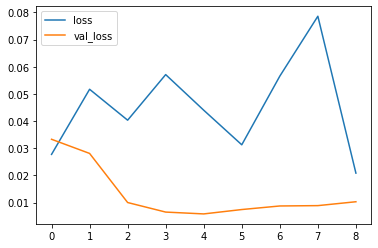

In [41]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

In [42]:
data['class'].std()

0.826114809400841

In [44]:

y_valid_hat = model.predict(X_valid)
y_valid_hat[:10]

array([[1.2837334e-04, 2.3074899e-04, 9.9705815e-01, 2.5827717e-03],
       [1.2014818e-04, 2.3055705e-04, 9.9710423e-01, 2.5451689e-03],
       [9.3575858e-05, 2.3346080e-04, 9.9727052e-01, 2.4023838e-03],
       [7.0590802e-05, 2.2991549e-04, 9.9742103e-01, 2.2785612e-03],
       [6.0013848e-05, 2.2615233e-04, 9.9749559e-01, 2.2181591e-03],
       [5.3501684e-05, 2.1826843e-04, 9.9754143e-01, 2.1868462e-03],
       [4.5930006e-05, 2.1525062e-04, 9.9760431e-01, 2.1346139e-03],
       [3.7758109e-05, 2.0580666e-04, 9.9767441e-01, 2.0820058e-03],
       [2.4329120e-05, 1.5989266e-04, 9.9784887e-01, 1.9669225e-03],
       [2.1374164e-05, 1.4497634e-04, 9.9790192e-01, 1.9317189e-03]],
      dtype=float32)

In [51]:
y_valid_hat.round(0)[889090:899000]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [46]:
y_valid[:10]

3     2
5     2
13    2
18    2
20    2
21    2
22    2
23    2
26    2
27    2
Name: class, dtype: int64

In [ ]:
predict = pd.read_csv('kddcup.testdata.unlabeled.gz')
predict.head()

In [ ]:
predict.columns

In [ ]:
col

In [ ]:
# predict is missing 'tcp', '215', '45076'

In [ ]:
# therefore, we can replace those with the mean of those columns

In [ ]:
mean_tcp = data['tcp'].mean()
mean_tcp

In [ ]:
mean_215 = data['215'].mean()
mean_215

In [ ]:
mean_45076 = data['45076'].mean()
mean_45076

In [ ]:
predict['tcp'] = mean_tcp
predict['215'] = mean_215
predict['45076'] = mean_45076
predict.head()

In [ ]:
predict = predict[col]
predict.shape

In [ ]:
predict.head()

In [ ]:
predict = sc.transform(predict)
predict

In [ ]:
y_predict = model.predict(predict)
y_predict[:10]

In [ ]:
y_predict.round(0)[:10]